<a href="https://colab.research.google.com/github/kennygiovanni/Data-Penjualan-Produk-Cetakan-Checkpoint-AVD-Kenny-Giovanni-Gavra/blob/main/Checkpoint_AVD_Kenny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA PENJUALAN PRODUK CETAKAN**

#**Import Library**


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.impute import KNNImputer


#**Memuat Dataset**

In [7]:
file = '/content/drive/MyDrive/Dataset AVD/data_penjualan.csv'

df = pd.read_csv(file, sep=';')
df

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
0,05/08/2022,Foodpak260,1000,1800,1800000
1,05/08/2022,FoodpakMatte245,1000,1900,1900000
2,05/08/2022,CraftLaminasi290,5000,750,3750000
3,05/08/2022,CraftLaminasi290,1000,1200,1200000
4,07/08/2022,Dupleks310,1000,1550,1550000
...,...,...,...,...,...
1071,14/11/2023,Ivory230,1000,900,900000
1072,15/11/2023,CraftLaminasi290,2000,800,1600000
1073,15/11/2023,CraftLaminasi290,1500,875,1312500
1074,15/11/2023,FoodpakMatte,1000,2200,2200000


Tanggal
Jumlah baris: 1076
Tipe data: object
Deskripsi: Tanggal transaksi penjualan cetakan

Jenis Produk
Jumlah baris: 1076
Tipe data: object
Deskripsi: Jenis produk cetakan yang terjual

Jumlah Produk
Jumlah baris: 1076
Tipe data: int64
Deskripsi: Jumlah unit produk yang terjual pada tanggal tertentu

Harga
Jumlah baris: 1076
Tipe data: int64
Deskripsi: Harga dari produk tertentu

Total
Jumlah baris: 1076
Tipe data: int64
Deskripsi: Total nilai penjualan dalam mata uang lokal (misalnya, Rupiah) untuk setiap transaksi



#**Business Understanding**

##**Business Objective**

Dataset ini mencakup rincian transaksi penjualan seperti waktu, jenis produk, volume pesanan, harga satuan, dan total nilai penjualan dalam periode tertentu. Meskipun data tersedia, perusahaan belum memiliki informasi akurat mengenai produk dengan performa terbaik. Akibatnya, penentuan produk unggulan untuk strategi promosi dan pengelolaan stok masih bersifat estimasi, sehingga pengambilan keputusan menjadi kurang optimal dalam meningkatkan laba.

Analisis ini bertujuan untuk mengidentifikasi produk dengan performa penjualan tertinggi berdasarkan jumlah pesanan dan total pendapatan. Hasil analisis ini akan menjadi landasan bagi perusahaan dalam mengoptimalkan strategi pemasaran serta manajemen stok pada produk-produk prioritas.


##**Assess Situation**

Upaya perusahaan percetakan buat meningkatkan keuntungan terhambat karena mereka belum mempunyai info akurat soal produk mana yang performanya paling bagus. Padahal, penentuan produk unggulan itu sangat penting. Lewat analisis data penjualan ini, kita harap bisa mendapatkan gambaran produk mana yang paling potensial untuk jadi acuan dalam menyusun strategi bisnis ke depannya.

##**Analytic Goals**

Untuk mendapatkan jenis produk unggulan agar perusahaan dapat memfokuskan strategi promosi dan penyediaan pada produk unggulan, perlu dilakukan:

1. Mengidentifikasi produk dengan jumlah order tertinggi.

2. Menghitung total pendapatan dari setiap jenis produk.

3. Mengelompokkan produk berdasarkan tingkat performa penjualan menjadi produk unggulan dan non-unggulan.

##**Project Plan**

1. Business Understanding
Menentukan tujuan analisis untuk mengetahui produk dengan performa penjualan terbaik sebagai dasar strategi promosi dan pengelolaan stok.

2. Data Understanding
Memahami struktur dan karakteristik data penjualan serta mengecek kelengkapan dan konsistensi data.

3. Data Preparation
Membersihkan dan menyiapkan data agar siap dianalisis, termasuk perbaikan format dan perhitungan total pendapatan per produk.

4. Visualisasi & Dashboard
Membuat grafik atau dashboard untuk menampilkan perbandingan jumlah order dan pendapatan tiap produk.

5. Analisis & Insight
Mengidentifikasi produk unggulan dan non-unggulan serta menyusun insight untuk mendukung pengambilan keputusan.

#**Data Understanding**

##**Deskripsi Data**

### **Informasi Dasar**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tanggal       1076 non-null   object
 1   Jenis Produk  1076 non-null   object
 2   Jumlah Order  1076 non-null   int64 
 3   Harga         1076 non-null   int64 
 4   Total         1076 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.2+ KB


Berdasarkan data di atas dapat diketahui bahwa dataset ini memiliki 1076 baris dan 5 kolom

### **Informasi Lanjutan**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tanggal       1076 non-null   object
 1   Jenis Produk  1076 non-null   object
 2   Jumlah Order  1076 non-null   int64 
 3   Harga         1076 non-null   int64 
 4   Total         1076 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 42.2+ KB


1. Tanggal:
        Jumlah baris: 1076
        Tipe data: object
        Deskripsi: Tanggal Transaksi

2. Jenis Produk:
        Jumlah baris: 1076
        Tipe data: object
        Deskripsi: Tipe produk yang dibeli

3. Jumlah Order:
        Jumlah baris: 1076
        Tipe data: int64
        Deskripsi: Jumlah barang yang dibeli

4. Harga:
        Jumlah baris: 1076
        Tipe data: int64
        Deskripsi: Harga satuan produk

5. Total:
        Jumlah baris: 1076
        Tipe data: int64
        Deskripsi: Total pendapatan pada transaksi


### **Informasi Statistik Deskriptif**

In [10]:
df.describe(include='all')

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
count,1076,1076,1076.000000,1076.000000,1.076000e+03
unique,284,94,NaN,NaN,NaN
top,06/01/2023,Dupleks310,NaN,NaN,NaN
freq,58,162,NaN,NaN,NaN
mean,NaN,NaN,1904.933086,1703.781599,2.345827e+06
std,NaN,NaN,2500.918899,3355.881482,1.730798e+06
min,NaN,NaN,5.000000,100.000000,1.537600e+04
25%,NaN,NaN,1000.000000,950.000000,1.312500e+06
50%,NaN,NaN,1000.000000,1500.000000,1.800000e+06
75%,NaN,NaN,2000.000000,1850.000000,3.000000e+06


1. Count (Kelengkapan Data)
Semua kolom memiliki 1076 baris, yang menunjukkan tidak ada nilai yang hilang.
---



2. Mean vs Median (Distribusi Data)
* Jumlah Order
  * Mean = 1904,93
  * Median = 1000 - Nilai rata-rata yang lebih tinggi dari median menunjukkan adanya beberapa transaksi dengan jumlah order yang sangat besar, mengindikasikan distribusi yang cenderung miring ke kanan (right-skewed).

* Harga
  * Mean = 1703,78
  * Median = 1.500 - Rata-rata harga sedikit lebih tinggi dari median menunjukkan adanya beberapa produk dengan harga yang lebih tinggi, membuat distribusi sedikit miring ke kanan.

* Total
  * Mean = 2.345.827
  * Median = 1.800.000 - Perbedaan yang signifikan antara mean dan median menunjukkan bahwa ada beberapa transaksi dengan total penjualan yang sangat tinggi, yang menarik nilai rata-rata ke atas dan mengindikasikan distribusi miring ke kanan.
---



3. Min dan Max (Rentang Nilai)

* Jumlah Order
  * Min = 5
  * Max = 4000 - Rentang yang sangat lebar ini menunjukkan variasi yang besar dalam jumlah produk yang dipesan, dengan beberapa pesanan sangat kecil dan beberapa sangat besar.

* Harga
  * Min = 100
  * Max = 99970 - Menunjukkan beragamnya harga produk dari yang sangat murah hingga sangat mahal

* Total
  * Min = 15.376
  * Max = 21.493.550- Rentang total penjualan yang sangat lebar mencerminkan variasi yang besar dalam nilai transaksi, dari yang terkecil hingga terbesar.
---



4. Standar Deviasi (std) - Variabilitas Data

* Jumlah Produk
  Standar deviasi (2500,91) yang besar dibandingkan dengan mean (1904,93) menunjukkan variabilitas yang tinggi dalam jumlah order.

* Harga
  Standar deviasi (3355,88) yang lebih besar dari mean (1703,78) juga menunjukkan variabilitas yang tinggi pada harga produk.
* Total
  Standar deviasi (1,73M) yang signifikan dibandingkan dengan mean (2,34M) mengindikasikan bahwa nilai total penjualan antar transaksi sangat bervariasi.

Secara keseluruhan, distribusi data untuk kolom numerik cenderung miring ke kanan, dengan adanya nilai-nilai ekstrem (outlier) yang tinggi, terutama pada Jumlah Order, Harga, dan Total.

## **Verify Data Qualify**

### **Data Type Check**

In [11]:
df.dtypes

,0
Tanggal,object
Jenis Produk,object
Jumlah Order,int64
Harga,int64
Total,int64


Pada tahap ini perlu dicek apakah tipe datanya sudah sesuai atau belum. Dari tipe data diatas dapat dilihat pada kolom Tanggal dengan tipe daat object yang seharusnya tipe datanya adalah date. Selain itu kolom lainnya sudah sesuai.

### **Inconsistent Values**

Pada tahap ini, kita perlu mengecek kekonsistenan data, contoh nya dalam penulisan. Hal ini dilakukan agar data tidak terduplikat dengan baris yang sebenarnya sama akan tetapi bisa terduplikat karena tidak konsisten.

In [12]:
print(df['Tanggal'].unique())

['05/08/2022' '07/08/2022' '08/08/2022' '09/08/2022' '10/08/2022'
 '11/08/2022' '12/08/2022' '13/08/2022' '15/08/2022' '16/08/2022'
 '18/08/2022' '22/08/2022' '29/08/2022' '30/08/2022' '31/08/2022'
 '01/09/2022' '02/09/2022' '03/09/2022' '05/09/2022' '07/09/2022'
 '08/09/2022' '14/09/2022' '19/09/2022' '24/09/2022' '04/10/2022'
 '05/10/2022' '06/10/2022' '07/10/2022' '08/10/2022' '09/10/2022'
 '10/10/2022' '11/10/2022' '12/10/2022' '13/10/2022' '14/10/2022'
 '15/10/2022' '16/10/2022' '17/10/2022' '18/10/2022' '19/10/2022'
 '20/10/2022' '21/10/2022' '22/10/2022' '23/10/2022' '24/10/2022'
 '05/11/2022' '08/11/2022' '10/11/2022' '13/11/2022' '20/11/2022'
 '22/11/2022' '23/11/2022' '26/11/2022' '29/11/2022' '01/12/2022'
 '02/12/2022' '03/12/2022' '05/12/2022' '06/12/2022' '07/12/2022'
 '12/12/2022' '13/12/2022' '14/12/2022' '15/12/2022' '01/01/2023'
 '06/01/2023' '01/02/2023' '05/02/2023' '09/02/2023' '13/02/2023'
 '16/02/2023' '19/02/2023' '21/02/2023' '23/02/2023' '02/03/2023'
 '03/03/20

1. Tanggal

Pada kolom tanggal semua data memiliki format yang sama yaitu dd/mm/yyyy. Jadi semua data pada kolom Tanggal formatnya konsisten.

In [13]:
print(df['Jenis Produk'].unique())

['Foodpak260' 'FoodpakMatte245' 'CraftLaminasi290' 'Dupleks310' 'Ivory270'
 'Kinstruk130' 'HVS' 'Dupleks350' 'CraftLaminasi' 'GRESSPROFF'
 'Ivory230+LaminasiDoff' '260Glossy' 'CraftFoodpak290' 'Ivory230'
 'Foodpak260Matte' 'Dupleks270' 'Kinstruk150' 'Kinstruk260'
 'FoodpakGlossy' 'Ivory300' 'Dupleks270Eplex' 'Ivory250' 'GreaseProof'
 'Foodpak295Matte' 'Foodpak260Glossy' 'FoodpakGlossy260' 'Foodpak295'
 'Dupleks400' 'FoodpakMatte295' 'Craft290' 'GreaseProof40'
 'GreaseProofPlano' 'Dupleks270Laminating' 'PTSariIndahPackagingIndustry'
 'Craft310' 'Dupleks310P' 'Ivory250+Laminasi' 'StikerA3'
 'Ivory230+LaminasiAlas' 'CraftBiasa310' 'Ivory230+Laminating'
 'Ivory260Matte' 'Craft290Laminasi' 'Craft300' 'DUPLEKS310'
 'KertasSisaIvory300' 'CraftFoodpak290Laminasi' 'Ivory350'
 'FoodpakGlossy320' 'Craft270' 'PTSARIINDAH' 'Dupleks350P' 'NCR'
 'Craft275' 'Craft275Biasa' 'Duplex310' 'Foodpak245Matte'
 'CEMERLANGINDAHSELARAS' 'Ivory245Matte' 'CraftPackaging8' 'KertasFolio'
 '245' 'StikerKertas' 'Craf

2. Jenis Produk

Pada kolom ini terlihat bahwa data datanya tidak ada kesalahan penulisan sehingga semua datanya konsisten.

### **Missing Values**

In [14]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Tanggal,0.0
Jenis Produk,0.0
Jumlah Order,0.0
Harga,0.0
Total,0.0


Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa pada setiap kolom tidak ada data yang hilang

### **Duplicated Values**

Pada tahap ini adalah mengecek jika ada duplikasi agar menghasilkan insight hasil yang bersih

In [15]:
df[df.duplicated()]

,Tanggal,Jenis Produk,Jumlah Order,Harga,Total
10,09/08/2022,Dupleks350,500,1800,900000
15,11/08/2022,Dupleks350,500,1800,900000
67,07/09/2022,Dupleks310,2000,1600,3200000
82,14/09/2022,Foodpak295,1000,1600,1600000
95,19/09/2022,Dupleks310,1000,1400,1400000
101,19/09/2022,CraftLaminasi290,1000,1200,1200000
105,24/09/2022,Dupleks310,1000,1900,1900000
116,24/09/2022,Ivory230,1000,1600,1600000
156,24/10/2022,Dupleks310,1000,1900,1900000
300,15/12/2022,Dupleks350,1000,2200,2200000


Terlihat pada dataset diatas terdapat lumayan banyak duplikasi tetapi karena dataset ini merupakan data penjualan bisa jadi merupakan kesamaan pembelian dan terjadi pada tanggal yang sama.

### **Outliers**

Pada tahap ini dilakukan pemeriksaan terhadap nilai-nilai ekstrem (outlier) pada kolom yang memiliki tipe data numerik. Tujuannya adalah untuk memperoleh insight yang lebih akurat sehingga dapat mendukung analisis serta pengembangan model yang akan dibuat.

Namun, tidak semua kolom harus ditangani dengan cara yang sama. Perlu dilakukan pemahaman terlebih dahulu terhadap fungsi dan tujuan masing-masing kolom dalam dataset.

In [16]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Jumlah Order,8.828996
Harga,3.066914
Total,6.412639


Pada data ini terlihat pada kolom:
* Jumlah Order = 8% outlier
* Harga = 3% outlier
* Total = 6% outlier

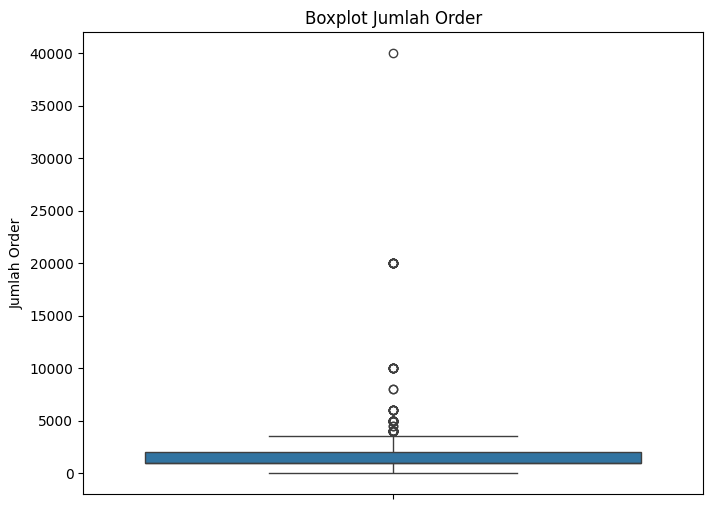

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Jumlah Order'])
plt.title('Boxplot Jumlah Order')
plt.ylabel('Jumlah Order')
plt.show()

Dari boxplot diatas menunjukkan variasi yang sangat tinggi dalam jumlah pesanan, dengan mayoritas pesanan kecil namun ada beberapa pesanan sangat besar (outlier).

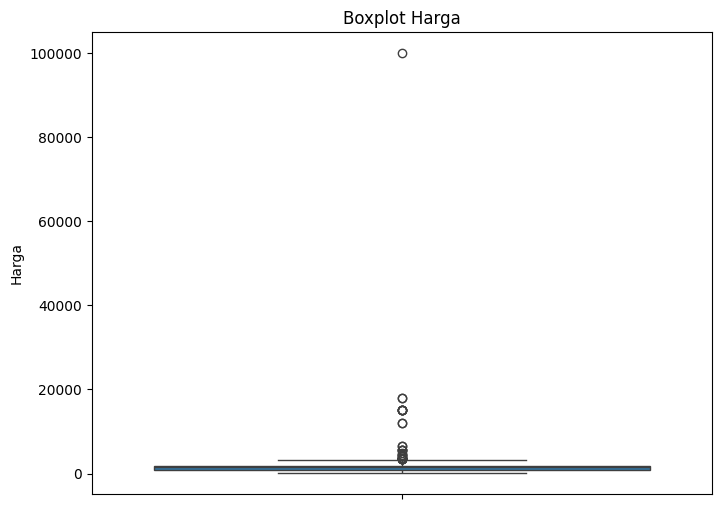

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Harga'])
plt.title('Boxplot Harga')
plt.ylabel('Harga')
plt.show()

Dari boxplot diatas menampilkan rentang harga produk yang luas, dari sangat murah hingga sangat mahal, dengan beberapa produk berharga premium sebagai outlier.

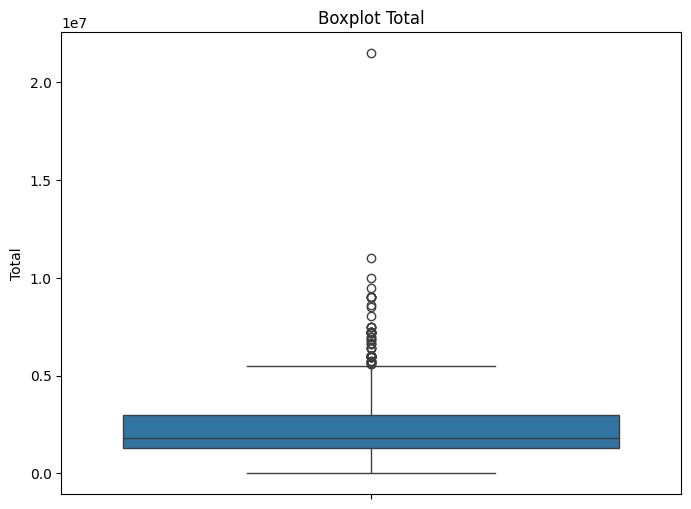

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total'])
plt.title('Boxplot Total')
plt.ylabel('Total')
plt.show()

Dari boxplot diatas mengindikasikan bahwa sebagian besar transaksi bernilai menengah, namun ada beberapa transaksi dengan nilai total yang sangat tinggi (outlier) yang berkontribusi signifikan pada pendapatan keseluruhan.

# **Exploratory Data Analysis**

## **Comparison**

Pada tahap perbandingan, dilakukan analisis terhadap 10 produk dengan jumlah pesanan tertinggi pada setiap jenis produk untuk mengetahui produk terlaris atau yang paling banyak dipesan.

Visualisasi : Bar Chart (Grafik Batang)

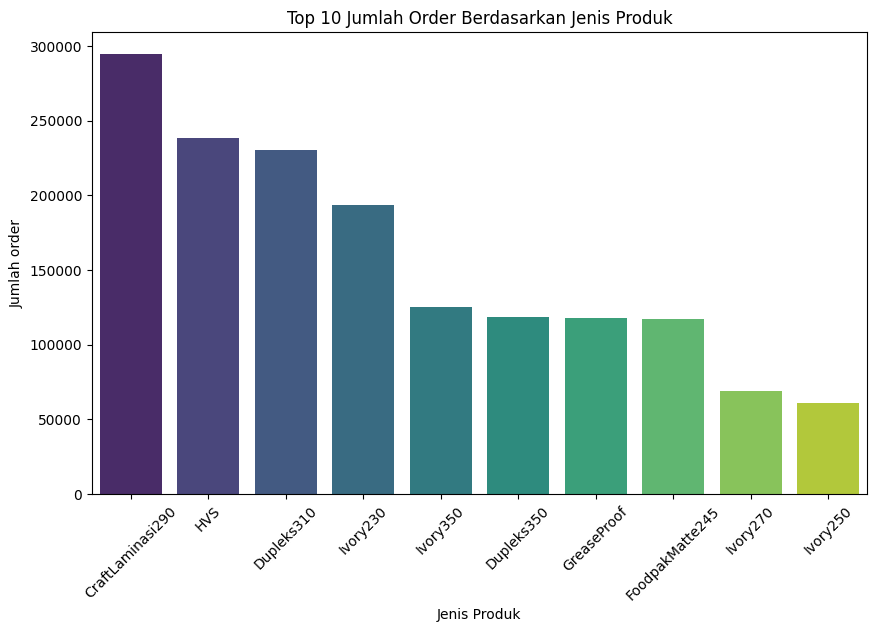

In [20]:
jumlahorder_jenisproduk = df.groupby('Jenis Produk')['Jumlah Order'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=jumlahorder_jenisproduk.index, y=jumlahorder_jenisproduk, palette='viridis', hue=jumlahorder_jenisproduk.index, legend=False)
plt.title('Top 10 Jumlah Order Berdasarkan Jenis Produk')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah order')
plt.xticks(rotation=45)
plt.show()

## **Composition**

Pada tahap komposisi, dilakukan analisis kontribusi pendapatan berdasarkan jenis produk untuk mengetahui 3 produk yang menyumbang paling besar.

Visualisasi : Pie Chart (Grafik Lingkaran)

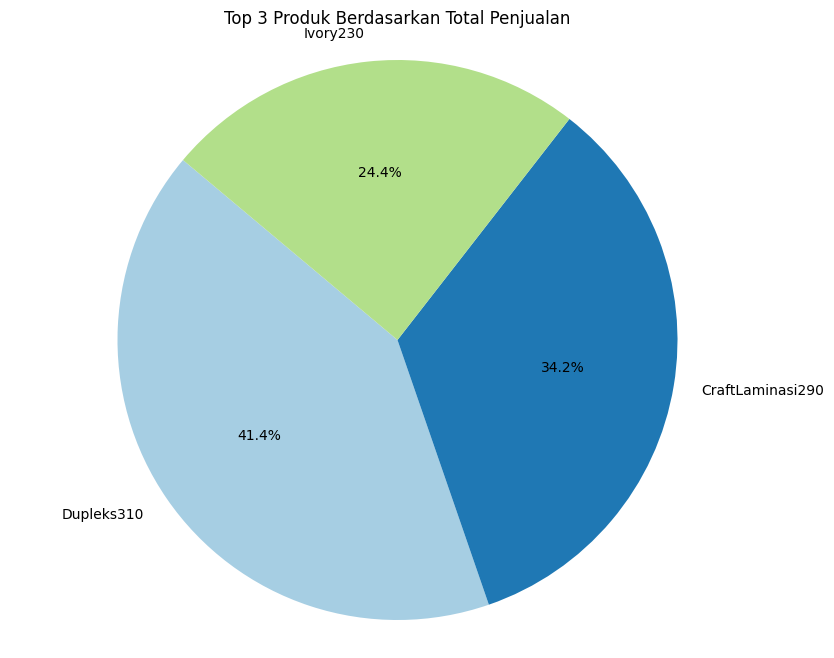

In [21]:
sales_by_category = df.groupby('Jenis Produk')['Total'].sum().sort_values(ascending=False)
sales_by_category_top3 = sales_by_category.head(3)

plt.figure(figsize=(10, 8))
sales_by_category_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 3 Produk Berdasarkan Total Penjualan')
plt.ylabel('')
plt.axis('equal')
plt.show()

## **Distribution**

Pada tahap distribusi dilakukan analisis pada setiap transaksi untuk mengetahui pola penyebaran jumlah pesanan pada setiap transaksi dalam dataset penjualan. Analisis ini bertujuan untuk melihat apakah transaksi lebih banyak terjadi dalam jumlah order kecil, sedang, atau besar

Visualisasi = Histogram

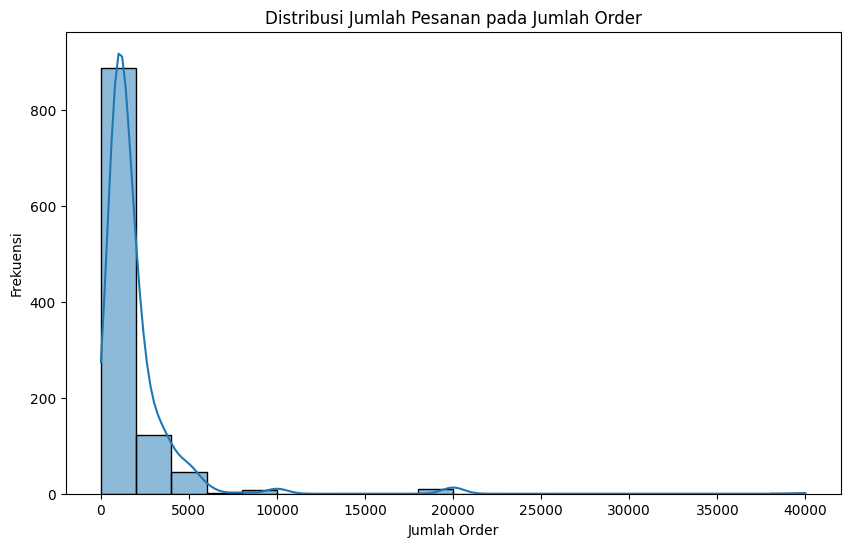

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Jumlah Order'], bins=20, kde=True)
plt.title('Distribusi Jumlah Pesanan pada Jumlah Order')
plt.xlabel('Jumlah Order')
plt.ylabel('Frekuensi')
plt.show()

## **Relationship**

Pada tahap relationship/hubungan dilakukan analisis terhadap jumlah order pada setiap harga produk untuk mengetahui apakah harga produk memengaruhi jumlah order.

visualisasi: heatmap

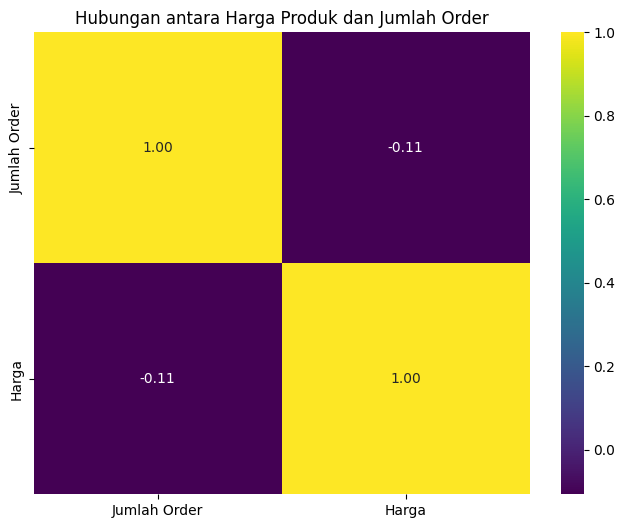

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Jumlah Order', 'Harga']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Hubungan antara Harga Produk dan Jumlah Order')
plt.show()

# **Data Preparation**

## **Data Type Check**

Pada tahap ini saya mengganti tipe data pada kolom **Tanggal** yang sebelumnya tipe data object menjadi datetime.

In [24]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"], format="mixed")
df["Tanggal"].head(5)

,Tanggal
0,2022-05-08
1,2022-05-08
2,2022-05-08
3,2022-05-08
4,2022-07-08


## **Missing Values**

Tidak ada data yang hilang.

## **Inconsistent Values**

Tidak ada data yang inkonsisten.

## **Duplicate Values**

Pada tahap ini data yang terdeteksi duplikat tidak dihapus karena tidak ada id transaksi yang merupakan pembeda setiap data dan kemungkinan karena kesamaan nilai pada kolom tanggal, jenis produk, dan jumlah order masih mungkin terjadi.

## **Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Jumlah Order,8.828996
Harga,3.066914
Total,6.412639


Pada kolom **Jumlah Order** terdapat outliers sebesar 8%, dalam dunia bisnis hal tersebut normal karena variasi jumlah order barang bisa berbeda-beda sesuai kebutuhan pelanggan, misalnya ada pelanggan yang ingin order 1000 barang dan bisa juga ada pelanggan yang ingin order 100 barang. Jadi tidak perlu ditangani.

Selanjutnya pada kolom **Harga** terdapat outliers sebesar 3%, hal tersebut wajar karena terdapat variasi harga barang sesuai dengan tipe produk. Jadi tidak perlu ditangani.

Outliers sebesar 6% pada kolom **Total** dapat menunjukkan transaksi yang tidak wajar dan berpotensi memengaruhi hasil analisis, terutama pada perhitungan statistik seperti rata-rata keuntungan. Oleh karena itu, diperlukan penanganan yang objektif menggunakan metode Interquartile Range (IQR).

Metode IQR menentukan batas bawah dan batas atas berdasarkan sebaran data pada kuartil pertama (Q1) dan kuartil ketiga (Q3), sehingga nilai yang terlalu rendah atau tinggi dapat diidentifikasi sebagai outlier. Metode ini dianggap objektif karena penentuan outlier didasarkan pada distribusi data, sehingga pembersihan data menjadi lebih konsisten dan mengurangi pengaruh nilai ekstrem terhadap analisis.

In [28]:
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Total'] = df['Total'].clip(lower=lower_bound, upper=upper_bound)

# **Construct Data**

Pada tahap konstruksi data, disini saya menambahkan kolom baru **Status Pembelian**, kolom tersebut berfungsi untuk menganalisis pola penjualan dengan mengelompokkan transaksi berdasarkan tingkat pembelian.

In [31]:
df['Status Pembelian'] = pd.qcut(
    df['Total'],
    q=3,
    labels=['Rendah','Sedang','Tinggi']
)

In [32]:
print(df.columns)

Index(['Tanggal', 'Jenis Produk', 'Jumlah Order', 'Harga', 'Total',
       'Status Pembelian'],
      dtype='object')


# **Data Reduction**

Tidak ada kolom yang perlu dihapus karena seluruh kolom mengandung informasi yang relevan.

# **Menyimpan Dataset**

In [34]:
df.to_csv('[Bersih]Dataset Penjualan Cetakan.csv', index=False)